## RNN-LSTM NETFLIX

RMSE: 17.936214560476287

(1239, 7)


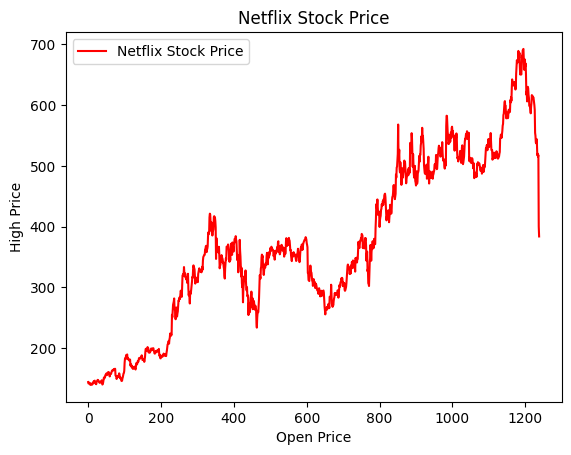

(1239, 1)
[[0.00861288 0.00396266 0.00620634 ... 0.03765425 0.03329352 0.02518728]
 [0.00396266 0.00620634 0.00653205 ... 0.03329352 0.02518728 0.02978322]
 [0.00620634 0.00653205 0.0056997  ... 0.02518728 0.02978322 0.03287736]
 ...
 [0.94823221 0.96636274 0.95774983 ... 0.68380196 0.68828942 0.67909748]
 [0.96636274 0.95774983 0.96127825 ... 0.68828942 0.67909748 0.68407342]
 [0.95774983 0.96127825 0.96509612 ... 0.67909748 0.68407342 0.47179098]]
[0.02978322 0.03287736 0.03267832 ... 0.68407342 0.47179098 0.4418992 ]
(1179, 60, 1)
Epoch 1/100
37/37 [==============================] - 13s 103ms/step - loss: 0.0355
Epoch 2/100
37/37 [==============================] - 4s 97ms/step - loss: 0.0058
Epoch 3/100
37/37 [==============================] - 4s 103ms/step - loss: 0.0049
Epoch 4/100
37/37 [==============================] - 5s 127ms/step - loss: 0.0056
Epoch 5/100
37/37 [==============================] - 4s 96ms/step - loss: 0.0049
Epoch 6/100
37/37 [==============================] 

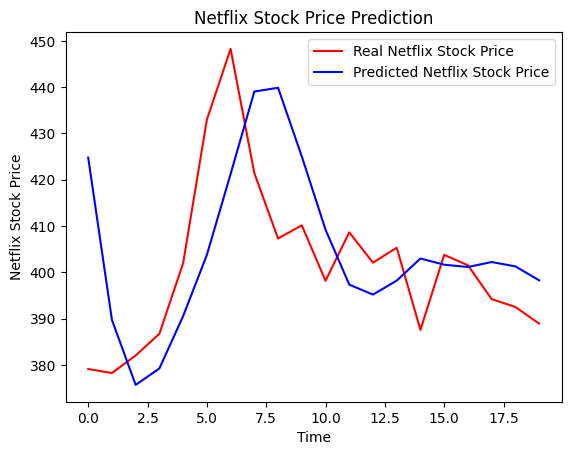

17.936214560476287


In [ ]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Netflix-train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print (dataset_train.shape)

plt.plot(training_set, color = 'red', label = 'Netflix Stock Price')
##plt.plot(training_set, color = 'blue', label = 'Predicted Netflix Stock Price')
plt.title('Netflix Stock Price')
plt.xlabel('Open Price')
plt.ylabel('High Price')
plt.legend()
plt.show()

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print (training_set_scaled.shape)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1239):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print (X_train)
print (y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print (X_train.shape)

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Netflix-test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Netflix Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()



import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

## GRU
RMSE: 14.223932307208726

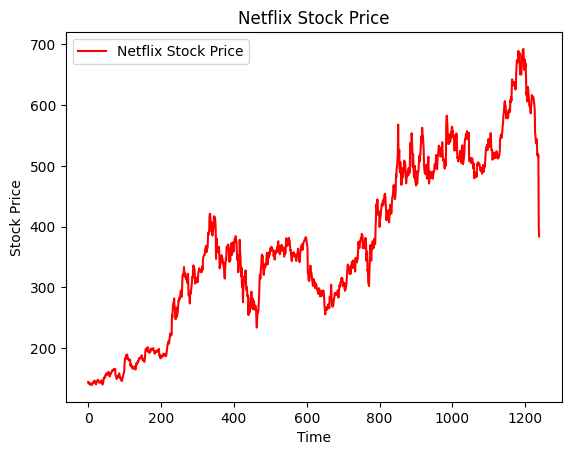

Epoch 1/100
37/37 [==============================] - 13s 110ms/step - loss: 0.0204
Epoch 2/100
37/37 [==============================] - 4s 104ms/step - loss: 0.0051
Epoch 3/100
37/37 [==============================] - 5s 124ms/step - loss: 0.0046
Epoch 4/100
37/37 [==============================] - 4s 120ms/step - loss: 0.0042
Epoch 5/100
37/37 [==============================] - 4s 104ms/step - loss: 0.0039
Epoch 6/100
37/37 [==============================] - 4s 110ms/step - loss: 0.0035
Epoch 7/100
37/37 [==============================] - 5s 136ms/step - loss: 0.0044
Epoch 8/100
37/37 [==============================] - 4s 105ms/step - loss: 0.0032
Epoch 9/100
37/37 [==============================] - 4s 103ms/step - loss: 0.0034
Epoch 10/100
37/37 [==============================] - 5s 143ms/step - loss: 0.0034
Epoch 11/100
37/37 [==============================] - 4s 105ms/step - loss: 0.0030
Epoch 12/100
37/37 [==============================] - 4s 105ms/step - loss: 0.0030
Epoch 13/100

1/1 [==============================] - 1s 1s/step


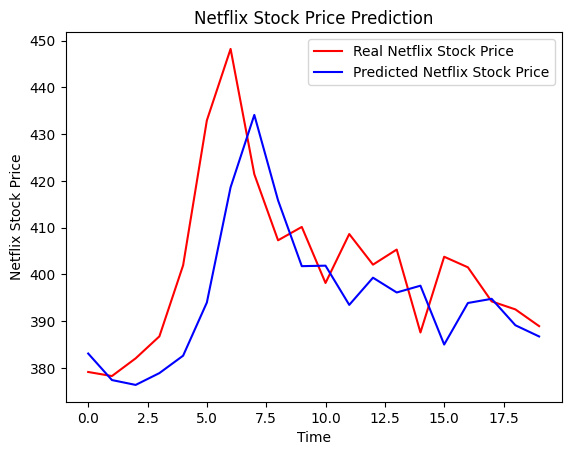

14.223932307208726


In [ ]:
# ------------------------------------------
# Data Preprocessing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Netflix-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Visualizing the training set
plt.plot(training_set, color='red', label='Netflix Stock Price')
plt.title('Netflix Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# ------------------------------------------
# Building the GRU Model

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor.add(GRU(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularisation
regressor.add(GRU(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


# ------------------------------------------
# Making Predictions and Visualizing Results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Netflix-test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Netflix Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

# Evaluating the model
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

# Random Forest

RMSE: 32.795488306092665

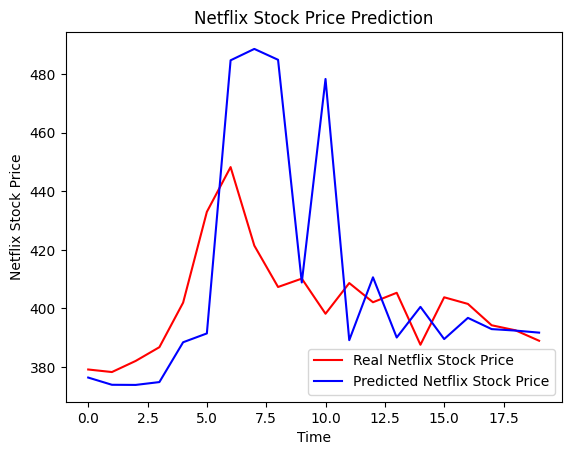

RMSE: 32.795488306092665
Execution Time: 7.83029317855835 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error
import time  # Library untuk mengukur waktu eksekusi

# Mengukur waktu mulai
start_time = time.time()

# Importing the training set
dataset_train = pd.read_csv('Netflix-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Random Forest Model
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Netflix-test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Preparing the test data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# Predicting the stock prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price.reshape(-1, 1))

# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Netflix Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

# Evaluating the model
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"RMSE: {rmse}")

# Mengukur waktu selesai dan menghitung waktu eksekusi
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")


# Linear Regession
RMSE: 13.913585269197316

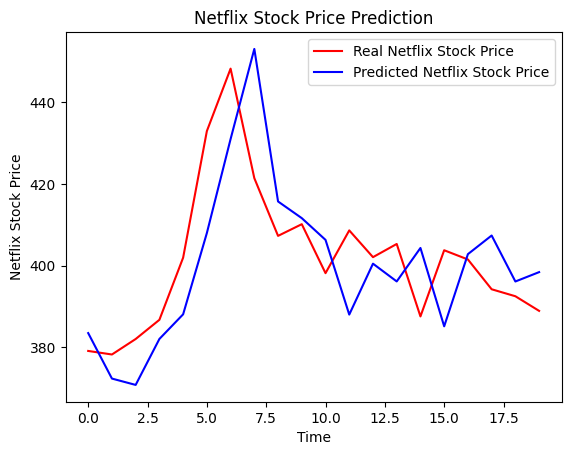

RMSE: 13.913585269197316
Execution Time: 0.7717316150665283 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
import time  # Library untuk mengukur waktu eksekusi

# Mengukur waktu mulai
start_time = time.time()

# Importing the training set
dataset_train = pd.read_csv('Netflix-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Netflix-test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Preparing the test data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# Predicting the stock prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price.reshape(-1, 1))

# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Netflix Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

# Evaluating the model
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"RMSE: {rmse}")

# Mengukur waktu selesai dan menghitung waktu eksekusi
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")


# Linear Regression Ridge (L2 regularization)

RMSE: 13.819455436159208

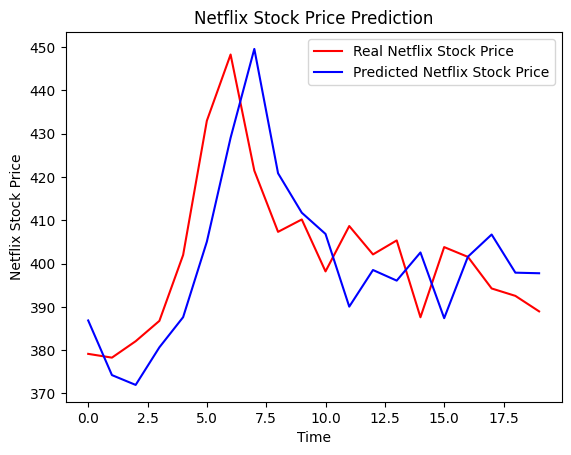

RMSE: 13.819455436159208
Execution Time: 0.9522323608398438 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import math
from sklearn.metrics import mean_squared_error
import time

# Start timing
start_time = time.time()

# Importing the training set
dataset_train = pd.read_csv('Netflix-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Linear Regression Model with Ridge Regularization
regressor = Ridge(alpha=0.05)  # Mengatur alpha untuk mengontrol kekuatan regularisasi
regressor.fit(X_train, y_train)

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Netflix-test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Preparing the test data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# Predicting the stock prices
predicted_stock_price = regressor.predict(X_test.reshape(-1, 60))
predicted_stock_price = sc.inverse_transform(predicted_stock_price.reshape(-1, 1))

# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Netflix Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

# Evaluating the model
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"RMSE: {rmse}")

# End timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")


# Linear Regression Ridge (L2 regularization) Optimasi Hyperparameter

RMSE: 13.802765541662865

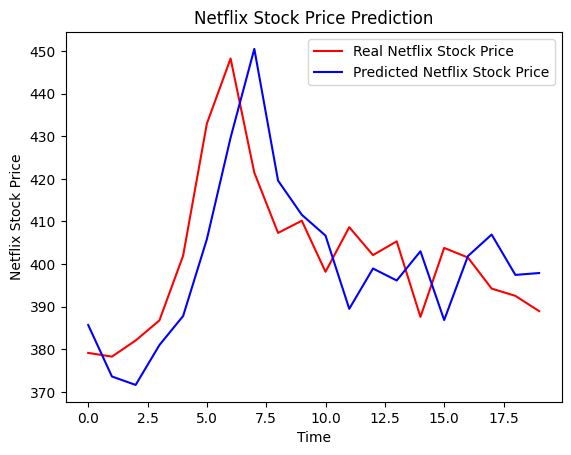

RMSE: 13.802765541662865
Best Alpha: 0.034
Execution Time: 1.596024513244629 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import mean_squared_error
import time

# Start timing
start_time = time.time()

# Importing the training set
dataset_train = pd.read_csv('Netflix-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Linear Regression Model with Ridge Regularization
ridge = Ridge()
parameters = {'alpha': np.linspace(0.001, 0.1, 10)}  # Grid of hyperparameters to search
regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
regressor.fit(X_train, y_train)

# Getting the best parameter
best_alpha = regressor.best_params_['alpha']

# Training the final model with the best parameter
final_regressor = Ridge(alpha=best_alpha)
final_regressor.fit(X_train, y_train)

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Netflix-test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Preparing the test data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# Predicting the stock prices
predicted_stock_price = final_regressor.predict(X_test.reshape(-1, 60))
predicted_stock_price = sc.inverse_transform(predicted_stock_price.reshape(-1, 1))

# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Netflix Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

# Evaluating the model
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"RMSE: {rmse}")

# Getting the best parameter
best_alpha = regressor.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Training the final model with the best parameter
final_regressor = Ridge(alpha=best_alpha)
final_regressor.fit(X_train, y_train)

# End timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")


(1179, 62)
Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


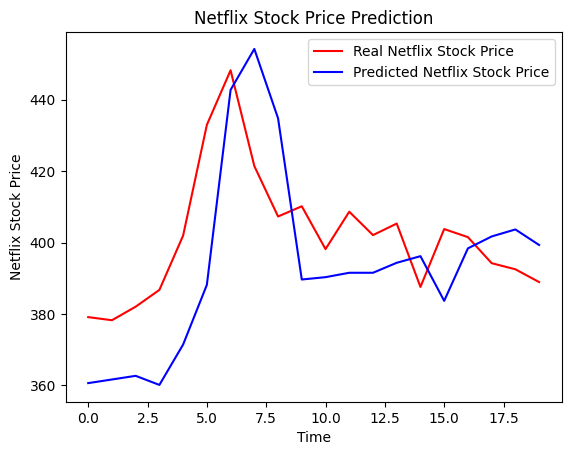

RMSE: 20.34448493473344
